In [52]:
import pandas as pd
import numpy as np
import openpyxl as xl
import numpy as np
import matplotlib.pyplot as plt
import requests


% matplotlib inline

In [53]:
oil_data_to_load = 'C:/Users/Sal/Desktop/Oil_Project/Eagle_Ford.xlsx'

In [54]:
# Read Oil Pandas Data Frames
oil_data_df = pd.read_excel(oil_data_to_load)

In [55]:
oil_data_df.head()

,API,Longitude,Latitude,Bottomhole longitude,Bottomhole latitude,Well Number,Lease Name,Well Type,Permit Type,Pad,...,IP Total (boe/d),EUR Oil (mmbbl),EUR Gas (bcf),EUR Total (mmboe),bi Oil,Di Oil (per month),Dmin Oil (per year),bi Gas,Di Gas (per month),Dmin Gas (per year)
0,42013342710000,-98.332847,28.954002,-98.331992,28.942858,1H,Little L & C,Oil,Horizontal,No,...,89.77,0.082,0.043,0.090,1.59,0.22,0.1,0.59,0.10,0.05
1,42013342730000,-98.455662,28.728584,-98.448771,28.714850,2H,Peeler Ranch,Oil,Horizontal,No,...,64.09,0.053,0.156,0.081,1.84,0.21,0.1,2.74,1.00,0.05
2,42013342780000,-98.470619,28.698830,-98.470619,28.698830,1H,Peeler Ranch,Oil,Horizontal,No,...,287.40,0.172,0.120,0.193,0.80,0.21,0.1,1.40,0.34,0.05
3,42013342790000,-98.450319,28.726421,-98.440780,28.715775,11H,Peeler Ranch,Oil,Horizontal,No,...,64.09,0.053,0.156,0.081,1.84,0.21,0.1,2.74,1.00,0.05
4,42013342850000,-98.439686,28.734653,-98.430205,28.724640,1H,Peeler Ranch Unit,Oil,Horizontal,No,...,139.48,0.105,0.119,0.125,1.24,0.19,0.1,1.86,1.00,0.05


In [56]:
oil_data_df.head()

# Drop all rows with missing information
cleaned_oil_df = oil_data_df.dropna(how='any')

In [ ]:
cleaned_oil_df

In [ ]:
# Show mulitple specific columns--note the extra brackets
cleaned_oil_df[["API", "Longitude","Latitude","Well Number","Well Type","Operator","Sub-play","Well Cost Total (US$)","EUR Total (mmboe)",'Cum365 Gas (mcf)',"Drilling Speed (m/day)"]].head(10)

Text(0,0.5,'Drilling Speed')

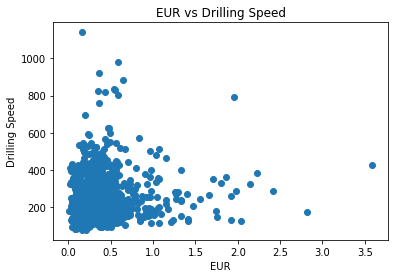

In [14]:
#Latitude vs Max Temp Scatter

plt.scatter(cleaned_oil_df["EUR Total (mmboe)"], cleaned_oil_df["Drilling Speed (m/day)"])
plt.title("EUR vs Drilling Speed")
plt.xlabel('EUR')
plt.ylabel('Drilling Speed')

In [81]:
#avg rig cost varabilable by subplay
rig_cost = cleaned_oil_df["Rig Cost (US$)"]
measured_depth = cleaned_oil_df["Measured Depth (m)"]

#rig cost by measured depth

rig_cost_by_measured_depth = rig_cost / measured_depth

In [120]:
#the_cum_sum_well_cost = cost_df.groupby(['Sub-play']).cumsum()['Well Cost Total (US$)']

In [138]:
# Build cost data frame# Build 
cost_df = pd.DataFrame({
                       'Sub-play':cleaned_oil_df['Sub-play'],
                       'County':cleaned_oil_df['County'],
                       'Well Cost Total (US$)':cleaned_oil_df['Well Cost Total (US$)'],
                       'Rig Cost (US$)':cleaned_oil_df['Rig Cost (US$)'],
                       'Water Cost (US$)':cleaned_oil_df['Water Cost (US$)'],
                       'Proppant Cost (US$)':cleaned_oil_df['Proppant Cost (US$)'],
                       'Pumping Cost (US$)':cleaned_oil_df['Pumping Cost (US$)'],
                       'Other Cost (US$)':cleaned_oil_df['Other Cost (US$)'],
                       'Lateral Length (m)': cleaned_oil_df['Lateral Length (m)'],
                       'Vertical Depth (m)': cleaned_oil_df['Vertical Depth (m)'],
                       'Measured Depth (m)': cleaned_oil_df['Measured Depth (m)'],
                       'EUR Total (mmboe)': cleaned_oil_df['EUR Total (mmboe)'],
                       'Cum365 Total (boe)': cleaned_oil_df['Cum365 Total (boe)'],
                       "Rig cost by depth": rig_cost_by_measured_depth
                       })

In [139]:
cost_df.head()

,Sub-play,County,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth
36,Karnes Trough,Atascosa,6466931.0,700321.0,360462.0,317805.0,370149.0,4390006.0,1909.0,3119.0,5129.0,0.129,26774.0,136.541431
67,Karnes Trough,Atascosa,5564731.0,600275.0,282989.0,273864.0,294318.0,3781883.0,1993.0,3120.0,5218.0,0.129,26774.0,115.039287
68,Black Oil,Atascosa,3847818.0,659702.0,178922.0,100949.0,346679.0,2326249.0,1036.0,2632.0,3722.0,0.113,36073.0,177.243955
90,Karnes Trough,Atascosa,7150483.0,471216.0,488230.0,178665.0,1177663.0,4542439.0,1280.0,3282.0,4630.0,0.138,55100.0,101.774514
93,Black Oil,Atascosa,4930074.0,1130918.0,214076.0,99206.0,398694.0,2861825.0,1199.0,2396.0,3659.0,0.163,49455.0,309.078437


In [162]:
# Calculate average costs# Calcu 
cost_avg = cost_df.groupby('Sub-play').mean()
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth
Sub-play,,,,,,,,,,,,
Black Oil,5.897168e+06,562963.671111,492693.080000,3.614364e+05,1.499080e+06,2.749232e+06,1823.457778,2444.773333,4364.368889,0.271093,90618.595556,130.667828
Edwards Condensate,6.468743e+06,514116.937705,410263.655738,5.026711e+05,1.813465e+06,2.922031e+06,1620.059016,3756.760656,5463.770492,0.514420,165526.806557,94.182525
Hawkville Condensate,7.271146e+06,574433.905660,572604.867925,3.868063e+05,1.717162e+06,3.697000e+06,1885.433962,3012.358491,4997.132075,0.307792,109749.207547,115.453276
Karnes Trough,6.760239e+06,583797.280000,430165.276000,6.216692e+05,1.786297e+06,3.035515e+06,1639.352000,3503.228000,5228.192000,0.421956,129540.488000,111.176184
Maverick Condensate,6.867779e+06,555951.580645,549926.774194,1.096102e+06,8.469642e+05,3.568871e+06,1796.225806,2472.419355,4363.290323,0.480323,176101.483871,126.069287
Maverick Oil,3.998836e+06,235608.000000,227349.000000,1.503250e+05,1.369020e+05,3.043163e+06,1637.000000,1534.000000,3257.000000,0.016000,3505.000000,72.338962
Southwest Gas,5.551731e+06,591199.285714,210767.571429,2.186070e+05,6.401450e+05,3.507704e+06,1406.285714,3651.000000,5131.714286,0.249000,101705.000000,115.266713


In [168]:
cost_avg.sort_values('Well Cost Total (US$)', ascending = False, inplace = True)
cost_avg
#the_cum_sum_well_cost =[]
the_cum_sum_well_cost = cost_avg.cumsum()['Well Cost Total (US$)']
the_cum_sum_well_cost

Sub-play
Hawkville Condensate    7.271146e+06
Maverick Condensate     1.413892e+07
Karnes Trough           2.089916e+07
Edwards Condensate      2.736791e+07
Black Oil               3.326507e+07
Southwest Gas           3.881681e+07
Maverick Oil            4.281564e+07
Name: Well Cost Total (US$), dtype: float64

In [165]:
cost_avg['Cumulative'] = the_cum_sum_well_cost

In [166]:
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth,Cumulative
Sub-play,,,,,,,,,,,,,
Maverick Oil,3.998836e+06,235608.000000,227349.000000,1.503250e+05,1.369020e+05,3.043163e+06,1637.000000,1534.000000,3257.000000,0.016000,3505.000000,72.338962,3.998836e+06
Southwest Gas,5.551731e+06,591199.285714,210767.571429,2.186070e+05,6.401450e+05,3.507704e+06,1406.285714,3651.000000,5131.714286,0.249000,101705.000000,115.266713,9.550567e+06
Black Oil,5.897168e+06,562963.671111,492693.080000,3.614364e+05,1.499080e+06,2.749232e+06,1823.457778,2444.773333,4364.368889,0.271093,90618.595556,130.667828,1.544774e+07
Edwards Condensate,6.468743e+06,514116.937705,410263.655738,5.026711e+05,1.813465e+06,2.922031e+06,1620.059016,3756.760656,5463.770492,0.514420,165526.806557,94.182525,2.191648e+07
Karnes Trough,6.760239e+06,583797.280000,430165.276000,6.216692e+05,1.786297e+06,3.035515e+06,1639.352000,3503.228000,5228.192000,0.421956,129540.488000,111.176184,2.867672e+07
Maverick Condensate,6.867779e+06,555951.580645,549926.774194,1.096102e+06,8.469642e+05,3.568871e+06,1796.225806,2472.419355,4363.290323,0.480323,176101.483871,126.069287,3.554450e+07
Hawkville Condensate,7.271146e+06,574433.905660,572604.867925,3.868063e+05,1.717162e+06,3.697000e+06,1885.433962,3012.358491,4997.132075,0.307792,109749.207547,115.453276,4.281564e+07


cost_avg

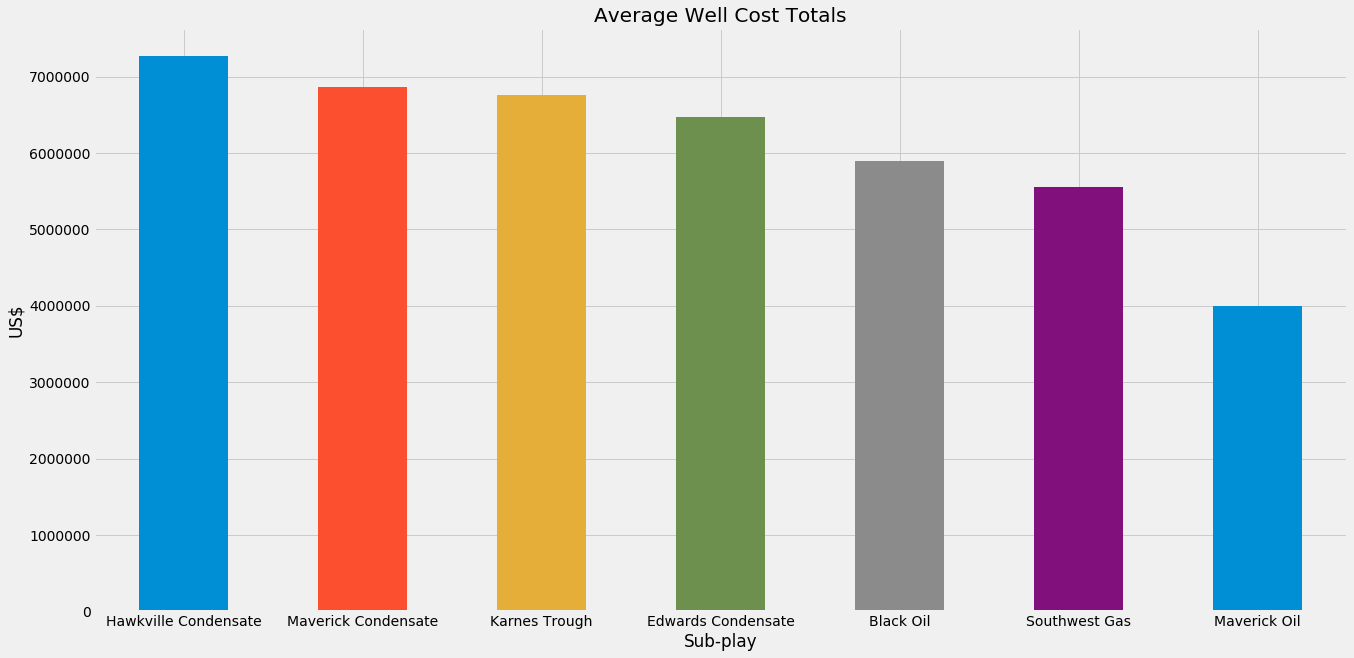

In [169]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg['Well Cost Total (US$)'].plot(kind='bar',figsize=(20, 10))

    # Add axis labels and title
    plt.title("Average Well Cost Totals")
    plt.ylabel("US$")

    # Show plot
    plt.xticks(rotation=0)
  # Save Figure
    plt.savefig("C:/Users/Sal/Desktop/avg_sort.png")
    
    plt.show()

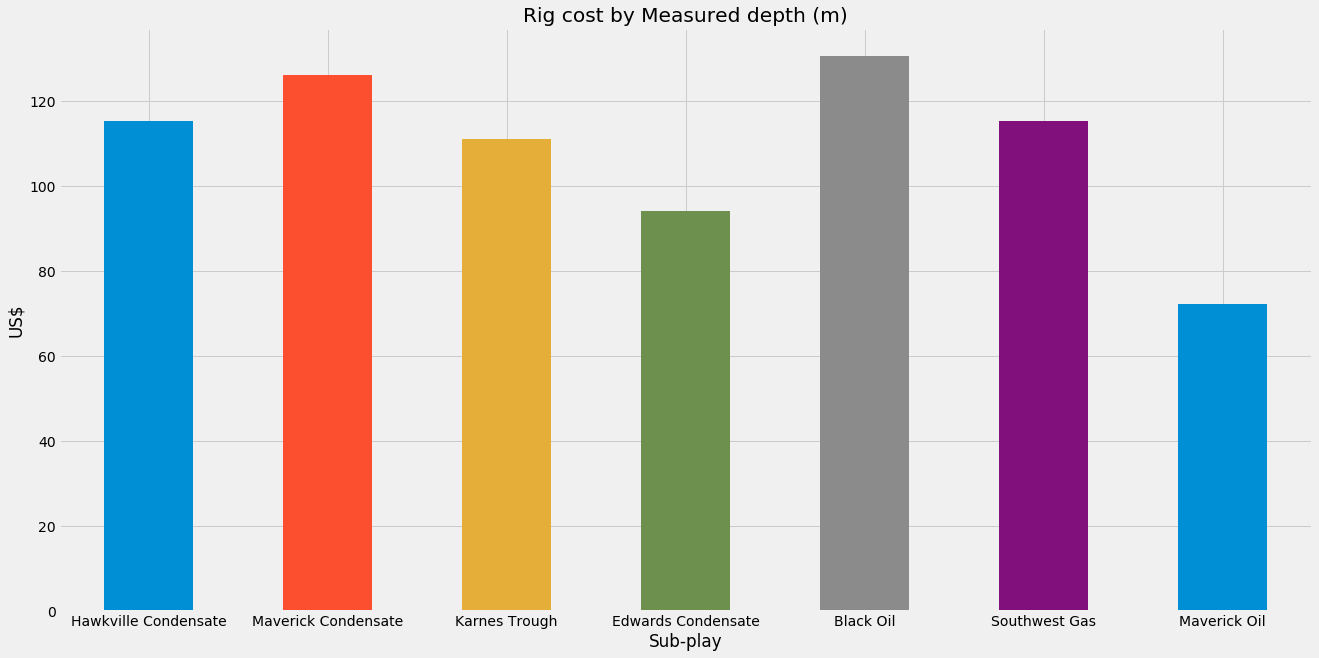

In [118]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg['Rig cost by depth'].plot(kind='bar',figsize=(20, 10))

    # Add axis labels and title
    plt.title("Rig cost by Measured depth (m)")
    plt.ylabel("US$")

    # Show plot
    plt.xticks(rotation=0)
     # Save Figure
    plt.savefig("C:/Users/Sal/Desktop/rig_sort.png")
    
    plt.show()

In [43]:
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe)
Sub-play,,,,,,,,,,,
Black Oil,5.897168e+06,562963.671111,492693.080000,3.614364e+05,1.499080e+06,2.749232e+06,1823.457778,2444.773333,4364.368889,0.271093,90618.595556
Edwards Condensate,6.468743e+06,514116.937705,410263.655738,5.026711e+05,1.813465e+06,2.922031e+06,1620.059016,3756.760656,5463.770492,0.514420,165526.806557
Hawkville Condensate,7.271146e+06,574433.905660,572604.867925,3.868063e+05,1.717162e+06,3.697000e+06,1885.433962,3012.358491,4997.132075,0.307792,109749.207547
Karnes Trough,6.760239e+06,583797.280000,430165.276000,6.216692e+05,1.786297e+06,3.035515e+06,1639.352000,3503.228000,5228.192000,0.421956,129540.488000
Maverick Condensate,6.867779e+06,555951.580645,549926.774194,1.096102e+06,8.469642e+05,3.568871e+06,1796.225806,2472.419355,4363.290323,0.480323,176101.483871
Maverick Oil,3.998836e+06,235608.000000,227349.000000,1.503250e+05,1.369020e+05,3.043163e+06,1637.000000,1534.000000,3257.000000,0.016000,3505.000000
Southwest Gas,5.551731e+06,591199.285714,210767.571429,2.186070e+05,6.401450e+05,3.507704e+06,1406.285714,3651.000000,5131.714286,0.249000,101705.000000


In [36]:
#avg rig cost varabilable by subplay
average_rig_cost = cost_avg["Rig Cost (US$)"]
average_measured_depth = cost_avg["Measured Depth (m)"]

#rig cost by measured depth

rig_cost_by_measured_depth = average_rig_cost / average_measured_depth

In [ ]:
rig_cost_by_measured_depth
cost_avg.sort_values('Cum365 Total (boe)', ascending = False, inplace = True)
rig_cost_by_measured_depth

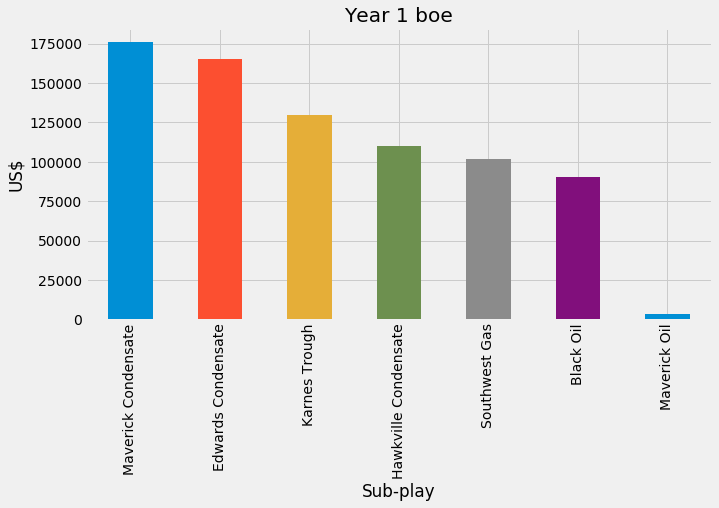

In [134]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg['Cum365 Total (boe)'].plot(kind='bar',figsize=(10, 5))

    # Add axis labels and title
    plt.title("Year 1 boe")
    plt.ylabel("US$")

    # Show plot
    plt.show()

In [184]:
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth,Cumulative
Sub-play,,,,,,,,,,,,,
Hawkville Condensate,7.271146e+06,574433.905660,572604.867925,3.868063e+05,1.717162e+06,3.697000e+06,1885.433962,3012.358491,4997.132075,0.307792,109749.207547,115.453276,4.281564e+07
Maverick Condensate,6.867779e+06,555951.580645,549926.774194,1.096102e+06,8.469642e+05,3.568871e+06,1796.225806,2472.419355,4363.290323,0.480323,176101.483871,126.069287,3.554450e+07
Karnes Trough,6.760239e+06,583797.280000,430165.276000,6.216692e+05,1.786297e+06,3.035515e+06,1639.352000,3503.228000,5228.192000,0.421956,129540.488000,111.176184,2.867672e+07
Edwards Condensate,6.468743e+06,514116.937705,410263.655738,5.026711e+05,1.813465e+06,2.922031e+06,1620.059016,3756.760656,5463.770492,0.514420,165526.806557,94.182525,2.191648e+07
Black Oil,5.897168e+06,562963.671111,492693.080000,3.614364e+05,1.499080e+06,2.749232e+06,1823.457778,2444.773333,4364.368889,0.271093,90618.595556,130.667828,1.544774e+07
Southwest Gas,5.551731e+06,591199.285714,210767.571429,2.186070e+05,6.401450e+05,3.507704e+06,1406.285714,3651.000000,5131.714286,0.249000,101705.000000,115.266713,9.550567e+06
Maverick Oil,3.998836e+06,235608.000000,227349.000000,1.503250e+05,1.369020e+05,3.043163e+06,1637.000000,1534.000000,3257.000000,0.016000,3505.000000,72.338962,3.998836e+06


In [ ]:
# Plot total cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg['Well Cost Total (US$)'].plot(kind='bar',figsize=(20, 10))

    # Add axis labels and title
    plt.title("Average Well Cost Totals")
    plt.ylabel("US$")

    plt.cost_avg['Cumulative Well cost']
    # Show plot
    plt.xticks(rotation=0)
  # Save Figure
    plt.savefig("C:/Users/Sal/Desktop/avg_sort.png")
    
    plt.show()

In [185]:
weights=[]
weights =cost_avg["Rig Cost (US$)"]
cumu_weights=[]
cumu_weights =cost_avg["Cumulative"]

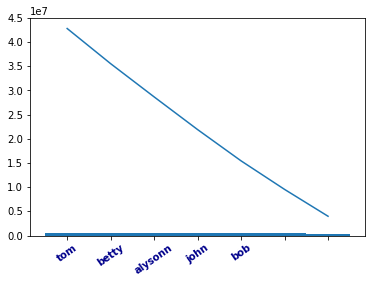

In [186]:
# lefthand edge of each bar
left = np.arange(len(weights))
fig, ax = plt.subplots(1, 1)
ax.bar(left, weights, 1)
ax.set_xticks(left)
ax.set_xticklabels(labels,fontsize=10, fontweight='bold', rotation=35, color='darkblue')
ax.plot(cumu_weights)